<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Day3.do.txt --no_mako -->
<!-- dom:TITLE: Data Analysis and Machine Learning: Ridge and Lasso Regression and Resampling Methods -->

# Data Analysis and Machine Learning: Ridge and Lasso Regression and Resampling Methods
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams and National Superconducting Cyclotron Laboratory, Michigan State University, USA

Date: **October 17 and 24, 2022**

## Plans for Sessions 4 and 5

* More on Ridge and Lasso Regression

* Statistics, probability theory and resampling methods

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

## From OLS to Ridge and Lasso

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

## SVD analysis

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression and dropping the parameter $1/n$ in front of the standard mean squared error equation, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicty)

$$
\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\mathrm{sgn}(\boldsymbol{\beta})=\left\{\begin{array}{cc} 1 & \beta > 0 \\-1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-2\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in Ridge regression or ordinary least squares. This equation can however be solved by using standard convex optimization algorithms using for example the Python package [CVXOPT](https://cvxopt.org/). We will discuss this later.

## Simple example to illustrate Ordinary Least Squares, Ridge and Lasso Regression

Let us assume that our design matrix is given by unit (identity) matrix, that is a square diagonal matrix with ones only along the
diagonal. In this case we have an equal number of rows and columns $n=p$.

Our model approximation is just $\tilde{\boldsymbol{y}}=\boldsymbol{\beta}$ and the mean squared error and thereby the cost function for ordinary least sqquares (OLS) is then (we drop the term $1/n$)

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{OLS}} = y_i.
$$

## Ridge Regression

For Ridge regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\beta_i^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{Ridge}} = \frac{y_i}{1+\lambda}.
$$

## Lasso Regression

For Lasso regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\vert\beta_i\vert=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\sqrt{\beta_i^2},
$$

and minimizing we have that

$$
-2\sum_{i=0}^{p-1}(y_i-\beta_i)+\lambda \sum_{i=0}^{p-1}\frac{(\beta_i)}{\vert\beta_i\vert}=0,
$$

which leads to

$$
\hat{\boldsymbol{\beta}}_i^{\mathrm{Lasso}} = \left\{\begin{array}{ccc}y_i-\frac{\lambda}{2} &\mathrm{if} & y_i> \frac{\lambda}{2}\\
                                                          y_i+\frac{\lambda}{2} &\mathrm{if} & y_i< -\frac{\lambda}{2}\\
							  0 &\mathrm{if} & \vert y_i\vert\le  \frac{\lambda}{2}\end{array}\right.\\.
$$

Plotting these results ([figure in handwritten notes for week 36](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2021/NotesSeptember9.pdf)) shows clearly that Lasso regression suppresses (sets to zero) values of $\beta_i$ for specific values of $\lambda$. Ridge regression reduces on the other hand the values of $\beta_i$ as function of $\lambda$.

## Yet another Example

Let us assume we have a data set with outputs/targets given by the vector

$$
\boldsymbol{y}=\begin{bmatrix}4 \\ 2 \\3\end{bmatrix},
$$

and our inputs as a $3\times 2$ design matrix

$$
\boldsymbol{X}=\begin{bmatrix}2 & 0\\ 0 & 1 \\ 0 & 0\end{bmatrix},
$$

meaning that we have two features and two unknown parameters $\beta_0$ and $\beta_1$ to be determined either by ordinary least squares, Ridge or Lasso regression.

## The OLS case

For ordinary least squares (OLS) we know that the optimal solution is

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left( \boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\begin{bmatrix}2 \\ 2\end{bmatrix},
$$

The code which implements this simpler case is presented after the discussion of Ridge and Lasso.

## The Ridge case

For Ridge regression we have

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\left( \boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\begin{bmatrix}\frac{8}{4+\lambda} \\ \frac{2}{1+\lambda}\end{bmatrix},
$$

There is normally a constraint on the value of $\vert\vert \boldsymbol{\beta}\vert\vert_2$ via the parameter $\lambda$.
Let us for simplicity assume that $\beta_0^2+\beta_1^2=1$ as constraint. This will allow us to find an expression for the optimal values of $\beta$ and $\lambda$.

To see this, let us write the cost function for Ridge regression.

## Writing the Cost Function

We define the MSE without the $1/n$ factor and have then, using that

$$
\boldsymbol{X}\boldsymbol{\beta}=\begin{bmatrix} 2\beta_0 \\ \beta_1 \\0 \end{bmatrix},
$$

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\beta_0^2+\beta_1^2),
$$

and taking the derivative with respect to $\beta_0$ we get

$$
\beta_0=\frac{8}{4+\lambda},
$$

and for $\beta_1$ we obtain

$$
\beta_1=\frac{2}{1+\lambda},
$$

Using the constraint for $\beta_0^2+\beta_1^2=1$ we can constrain $\lambda$ by solving

$$
\left(\frac{8}{4+\lambda}\right)^2+\left(\frac{2}{1+\lambda}\right)^2=1,
$$

which gives $\lambda=4.571$ and $\beta_0=0.933$ and $\beta_1=0.359$.

## Lasso case

For Lasso we need now, keeping a  constraint on $\vert\beta_0\vert+\vert\beta_1\vert=1$,  to take the derivative of the absolute values of $\beta_0$
and $\beta_1$. This gives us the following derivatives of the cost function

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\vert\beta_0\vert+\vert\beta_1\vert),
$$

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_0}=-4(4-2\beta_0)+\lambda\mathrm{sgn}(\beta_0)=0,
$$

and

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_1}=-2(2-\beta_1)+\lambda\mathrm{sgn}(\beta_1)=0.
$$

We have now four cases to solve besides the trivial cases $\beta_0$ and/or $\beta_1$ are zero, namely
1. $\beta_0 > 0$ and $\beta_1 > 0$,

2. $\beta_0 > 0$ and $\beta_1 < 0$,

3. $\beta_0 < 0$ and $\beta_1 > 0$,

4. $\beta_0 < 0$ and $\beta_1 < 0$.

## The first Case

If we consider the first case, we have then

$$
-4(4-2\beta_0)+\lambda=0,
$$

and

$$
-2(2-\beta_1)+\lambda=0.
$$

which yields

$$
\beta_0=\frac{16+\lambda}{8},
$$

and

$$
\beta_1=\frac{4+\lambda}{2}.
$$

Using the constraint on $\beta_0$ and $\beta_1$ we can then find the optimal value of $\lambda$ for the different cases. We leave this as an exercise to you.

## Simple code for solving the above problem

Here we set up the OLS, Ridge and Lasso functionality in order to study the above example. Note that here we have opted for a set of values of $\lambda$, meaning that we need to perform a search in order to find the optimal values.

First we study and compare the OLS and Ridge results.  The next code compares all three methods.

[2. 2.]
Training MSE for OLS
3.0


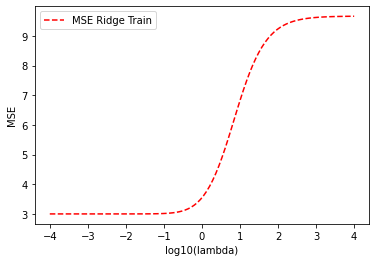

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
#    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSEPredict[i] = MSE(y,ypredictRidge)
#    print(MSEPredict[i])
    # Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here that we reach a plateau. What is actually happening?

## With Lasso Regression

[2. 2.]
Training MSE for OLS
3.0
[1.99995    1.99980002]
[ 0.50001525 -0.99953475]
[1.99993978 1.99975913]
[ 0.50001525 -0.99944272]
[1.99992746 1.99970988]
[ 0.50001525 -0.99933188]
[1.99991263 1.99965056]
[ 0.50001525 -0.99919837]
[1.99989476 1.99957911]
[ 0.50001524 -0.99903755]
[1.99987324 1.99949306]
[ 0.50001524 -0.99884384]
[1.99984732 1.99938942]
[ 0.50001524 -0.99861053]
[1.9998161  1.99926459]
[ 0.50001523 -0.9983295 ]
[1.99977849 1.99911427]
[ 0.50001523 -0.99799099]
[1.9997332  1.99893323]
[ 0.50001522 -0.99758326]
[1.99967865 1.99871521]
[ 0.50001521 -0.99709215]
[1.99961294 1.99845267]
[ 0.50001521 -0.99650061]
[1.99953381 1.99813653]
[ 0.50001519 -0.99578809]
[1.9994385  1.99775587]
[ 0.50001518 -0.99492986]
[1.9993237  1.99729756]
[ 0.50001517 -0.99389612]
[1.99918546 1.9967458 ]
[ 0.50001515 -0.99265097]
[1.99901896 1.99608161]
[ 0.50001512 -0.99115119]
[1.99881845 1.99528218]
[ 0.5000151 -0.9893447]
[1.998577  1.9943201]
[ 0.50001506 -0.98716878]
[1.99828624 1.9931625

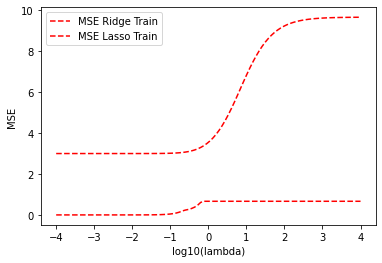

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X,y)
    ypredictLasso = RegLasso.predict(X)
    print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Another Example, now with a polynomial fit

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)

# number of features p (here degree of polynomial
p = 3
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),p))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x*x
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
# and then make the prediction
ytildeOLS = X_train @ OLSbeta
print("Training MSE for OLS")
print(MSE(y_train,ytildeOLS))
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))

# Repeat now for Lasso and Ridge regression and various values of the regularization parameter
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
MSELassoTrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # include lasso using Scikit-Learn
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    ytildeLasso = RegLasso.predict(X_train)
    ypredictLasso = RegLasso.predict(X_test)
    MSEPredict[i] = MSE(y_test,ypredictRidge)
    MSETrain[i] = MSE(y_train,ytildeRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    MSELassoTrain[i] = MSE(y_train,ytildeLasso)

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoTrain, label = 'MSE Lasso train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Linking the regression analysis with a statistical interpretation

We will now couple the discussions of ordinary least squares, Ridge
and Lasso regression with a statistical interpretation, that is we
move from a linear algebra analysis to a statistical analysis. In
particular, we will focus on what the regularization terms can result
in.  We will amongst other things show that the regularization
parameter can reduce considerably the variance of the parameters
$\beta$.

The
advantage of doing linear regression is that we actually end up with
analytical expressions for several statistical quantities.  
Standard least squares and Ridge regression  allow us to
derive quantities like the variance and other expectation values in a
rather straightforward way.

It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{y}_i$ is also a random variable. In particular,
$\mathbf{y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \boldsymbol{\beta}$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{y}_i$ we need to calculate its first two moments. 

Recall that $\boldsymbol{X}$ is a matrix of dimensionality $n\times p$. The
notation above $\mathbf{X}_{i,\ast}$ means that we are looking at the
row number $i$ and perform a sum over all values $p$.

## Assumptions made

The assumption we have made here can be summarized as (and this is going to be useful when we discuss the bias-variance trade off)
that there exists a function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim \mathcal{N}(0, \sigma^2)$
which describe our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We approximate this function with our model from the solution of the linear regression equations, that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we want to minimize $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, our MSE, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

## Expectation value and variance

We can calculate the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\begin{align*} 
\mathbb{E}(y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \boldsymbol{\beta}) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(y_i) & = \mathbb{E} \{ [y_i
- \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) -
[\mathbb{E}(y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \boldsymbol{\beta} + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \boldsymbol{\beta} +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$ (not be confused with the singular values of the SVD).

## Expectation value and variance for $\boldsymbol{\beta}$

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we can evaluate the expectation value

$$
\mathbb{E}(\boldsymbol{\beta}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\boldsymbol{\beta}=\boldsymbol{\beta}.
$$

This means that the estimator of the regression parameters is unbiased.

We can also calculate the variance

The variance of $\boldsymbol{\beta}$ is

$$
\begin{eqnarray*}
\mbox{Var}(\boldsymbol{\beta}) & = & \mathbb{E} \{ [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})] [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}]^{T} \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} \, \mathbf{Y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{Y} \, \mathbf{Y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^T
\\
& = & \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

where we have used  that $\mathbb{E} (\mathbf{Y} \mathbf{Y}^{T}) =
\mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \, \mathbf{X}^{T} +
\sigma^2 \, \mathbf{I}_{nn}$. From $\mbox{Var}(\boldsymbol{\beta}) = \sigma^2
\, (\mathbf{X}^{T} \mathbf{X})^{-1}$, one obtains an estimate of the
variance of the estimate of the $j$-th regression coefficient:
$\boldsymbol{\sigma}^2 (\boldsymbol{\beta}_j ) = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $. This may be used to
construct a confidence interval for the estimates.

In a similar way, we can obtain analytical expressions for say the
expectation values of the parameters $\boldsymbol{\beta}$ and their variance
when we employ Ridge regression, allowing us again to define a confidence interval. 

It is rather straightforward to show that

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}.
$$

We see clearly that 
$\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] \not= \boldsymbol{\beta}^{\mathrm{OLS}}$ for any $\lambda > 0$. We say then that the ridge estimator is biased.

We can also compute the variance as

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T} \mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T},
$$

and it is easy to see that if the parameter $\lambda$ goes to infinity then the variance of Ridge parameters $\boldsymbol{\beta}$ goes to zero. 

With this, we can compute the difference

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{OLS}}]-\mbox{Var}(\boldsymbol{\beta}^{\mathrm{Ridge}})=\sigma^2 [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}[ 2\lambda\mathbf{I} + \lambda^2 (\mathbf{X}^{T} \mathbf{X})^{-1} ] \{ [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}.
$$

The difference is non-negative definite since each component of the
matrix product is non-negative definite. 
This means the variance we obtain with the standard OLS will always for $\lambda > 0$ be larger than the variance of $\boldsymbol{\beta}$ obtained with the Ridge estimator. This has interesting consequences when we discuss the so-called bias-variance trade-off below.

## Deriving OLS from a probability distribution

Our basic assumption when we derived the OLS equations was to assume
that our output is determined by a given continuous function
$f(\boldsymbol{x})$ and a random noise $\boldsymbol{\epsilon}$ given by the normal
distribution with zero mean value and an undetermined variance
$\sigma^2$.

We found above that the outputs $\boldsymbol{y}$ have a mean value given by
$\boldsymbol{X}\hat{\boldsymbol{\beta}}$ and variance $\sigma^2$. Since the entries to
the design matrix are not stochastic variables, we can assume that the
probability distribution of our targets is also a normal distribution
but now with mean value $\boldsymbol{X}\hat{\boldsymbol{\beta}}$. This means that a
single output $y_i$ is given by the Gaussian distribution

$$
y_i\sim \mathcal{N}(\boldsymbol{X}_{i,*}\boldsymbol{\beta}, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

## Independent and Identically Distrubuted (iid)

We assume now that the various $y_i$ values are stochastically distributed according to the above Gaussian distribution. 
We define this distribution as

$$
p(y_i, \boldsymbol{X}\vert\boldsymbol{\beta})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]},
$$

which reads as finding the likelihood of an event $y_i$ with the input variables $\boldsymbol{X}$ given the parameters (to be determined) $\boldsymbol{\beta}$.

Since these events are assumed to be independent and identicall distributed we can build the probability distribution function (PDF) for all possible event $\boldsymbol{y}$ as the product of the single events, that is we have

$$
p(\boldsymbol{y},\boldsymbol{X}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}=\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta}).
$$

We will write this in a more compact form reserving $\boldsymbol{D}$ for the domain of events, including the ouputs (targets) and the inputs. That is
in case we have a simple one-dimensional input and output case

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})].
$$

In the more general case the various inputs should be replaced by the possible features represented by the input data set $\boldsymbol{X}$. 
We can now rewrite the above probability as

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

It is a conditional probability (see below) and reads as the likelihood of a domain of events $\boldsymbol{D}$ given a set of parameters $\boldsymbol{\beta}$.

## Maximum Likelihood Estimation (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of
estimating the parameters of an assumed probability distribution,
given some observed data. This is achieved by maximizing a likelihood
function so that, under the assumed statistical model, the observed
data is the most probable. 

We will assume here that our events are given by the above Gaussian
distribution and we will determine the optimal parameters $\beta$ by
maximizing the above PDF. However, computing the derivatives of a
product function is cumbersome and can easily lead to overflow and/or
underflowproblems, with potentials for loss of numerical precision.

In practice, it is more convenient to maximize the logarithm of the
PDF because it is a monotonically increasing function of the argument.
Alternatively, and this will be our option, we will minimize the
negative of the logarithm since this is a monotonically decreasing
function.

Note also that maximization/minimization of the logarithm of the PDF
is equivalent to the maximization/minimization of the function itself.

## A new Cost Function

We could now define a new cost function to minimize, namely the negative logarithm of the above PDF

$$
C(\boldsymbol{\beta}=-\log{\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})}=-\sum_{i=0}^{n-1}\log{p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})},
$$

which becomes

$$
C(\boldsymbol{\beta}=\frac{n}{2}\log{2\pi\sigma^2}+\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}.
$$

Taking the derivative of the *new* cost function with respect to the parameters $\beta$ we recognize our familiar OLS equation, namely

$$
\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) =0,
$$

which leads to the well-known OLS equation for the optimal paramters $\beta$

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}!
$$

Before we make a similar analysis for Ridge and Lasso regression, we need a short reminder on statistics.

## More basic Statistics and Bayes' theorem

A central theorem in statistics is Bayes' theorem. This theorem plays a similar role as the good old Pythagoras' theorem in geometry.
Bayes' theorem is extremely simple to derive. But to do so we need some basic axioms from statistics.

Assume we have two domains of events $X=[x_0,x_1,\dots,x_{n-1}]$ and $Y=[y_0,y_1,\dots,y_{n-1}]$.

We define also the likelihood for $X$ and $Y$ as $p(X)$ and $p(Y)$ respectively.
The likelihood of a specific event $x_i$ (or $y_i$) is then written as $p(X=x_i)$ or just $p(x_i)=p_i$. 

**Union of events is given by.**

$$
p(X \cup Y)= p(X)+p(Y)-p(X \cap Y).
$$

**The product rule (aka joint probability) is given by.**

$$
p(X \cup Y)= p(X,Y)= p(X\vert Y)p(Y)=p(Y\vert X)p(X),
$$

where we read $p(X\vert Y)$ as the likelihood of obtaining $X$ given $Y$.

If we have independent events then $p(X,Y)=p(X)p(Y)$.

## Marginal Probability

The marginal probability is defined in terms of only one of the set of variables $X,Y$. For a discrete probability we have

$$
p(X)=\sum_{i=0}^{n-1}p(X,Y=y_i)=\sum_{i=0}^{n-1}p(X\vert Y=y_i)p(Y=y_i)=\sum_{i=0}^{n-1}p(X\vert y_i)p(y_i).
$$

## Conditional  Probability

The conditional  probability, if $p(Y) > 0$, is

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)}=\frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}.
$$

## Bayes' Theorem

If we combine the conditional probability with the marginal probability and the standard product rule, we have

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)},
$$

which we can rewrite as

$$
p(X\vert Y)= \frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}=\frac{p(Y\vert X)p(X)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)},
$$

which is Bayes' theorem. It allows us to evaluate the uncertainty in in $X$ after we have observed $Y$. We can easily interchange $X$ with $Y$.

## Interpretations of Bayes' Theorem

The quantity $p(Y\vert X)$ on the right-hand side of the theorem is
evaluated for the observed data $Y$ and can be viewed as a function of
the parameter space represented by $X$. This function is not
necesseraly normalized and is normally called the likelihood function.

The function $p(X)$ on the right hand side is called the prior while the function on the left hand side is the called the posterior probability. The denominator on the right hand side serves as a normalization factor for the posterior distribution.

Let us try to illustrate Bayes' theorem through an example.

## Example of Usage of Bayes' theorem

Let us suppose that you are undergoing a series of mammography scans in
order to rule out possible breast cancer cases.  We define the
sensitivity for a positive event by the variable $X$. It takes binary
values with $X=1$ representing a positive event and $X=0$ being a
negative event. We reserve $Y$ as a classification parameter for
either a negative or a positive breast cancer confirmation. (Short note on wordings: positive here means having breast cancer, although none of us would consider this being a  positive thing).

We let $Y=1$ represent the the case of having breast cancer and $Y=0$ as not.

Let us assume that if you have breast cancer, the test will be positive with a probability of $0.8$, that is we have

$$
p(X=1\vert Y=1) =0.8.
$$

This obviously sounds  scary since many would conclude that if the test is positive, there is a likelihood of $80\%$ for having cancer.
It is however not correct, as the following Bayesian analysis shows.

## Doing it correctly

If we look at various national surveys on breast cancer, the general likelihood of developing breast cancer is a very small number.
Let us assume that the prior probability in the population as a whole is

$$
p(Y=1) =0.004.
$$

We need also to account for the fact that the test may produce a false positive result (false alarm). Let us here assume that we have

$$
p(X=1\vert Y=0) =0.1.
$$

Using Bayes' theorem we can then find the posterior probability that the person has breast cancer in case of a positive test, that is we can compute

$$
p(Y=1\vert X=1)=\frac{p(X=1\vert Y=1)p(Y=1)}{p(X=1\vert Y=1)p(Y=1)+p(X=1\vert Y=0)p(Y=0)}=\frac{0.8\times 0.004}{0.8\times 0.004+0.1\times 0.996}=0.031.
$$

That is, in case of a positive test, there is only a $3\%$ chance of having breast cancer!

## Bayes' Theorem and Ridge and Lasso Regression

Hitherto we have discussed Ridge and Lasso regression in terms of a
linear analysis. This may to many of you feel rather technical and
perhaps not that intuitive. The question is whether we can develop a
more intuitive way of understanding what Ridge and Lasso express.

Before we proceed let us perform a Ridge, Lasso  and OLS analysis of a polynomial fit.

## Test Function for what happens with OLS, Ridge and Lasso

We will play around with a study of the values for the optimal
parameters $\boldsymbol{\beta}$ using OLS, Ridge and Lasso regression.  For
OLS, you will notice as function of the noise and polynomial degree,
that the parameters $\beta$ will fluctuate from order to order in the
polynomial fit and that for larger and larger polynomial degrees of freedom, the parameters will tend to increase in value for OLS.

For Ridge and Lasso regression, the higher order parameters will typically be reduced, providing thereby less fluctuations from one order to another one.

[ 0.97523455  0.7377625  -2.68184534  2.49582779 -0.61123411]
Test MSE OLS
0.9613581306042737
0.001 [ 0.976008    0.72275971 -2.61645952  2.39659127 -0.56253801]
0.001 [ 1.0296806  -0.14099042 -0.0272407  -0.          0.        ]
0.021544346900318832 [ 0.98497831  0.55050252 -1.8706394   1.26987542 -0.01154817]
0.021544346900318832 [ 0.92974258 -0.         -0.         -0.         -0.        ]
0.46415888336127775 [ 1.00274176  0.27349297 -0.85693479 -0.06216287  0.56683413]
0.46415888336127775 [0.48712804 0.         0.         0.         0.        ]
10.0 [ 1.02709808 -0.03977485 -0.2583852  -0.04442597  0.20032886]
10.0 [0. 0. 0. 0. 0.]


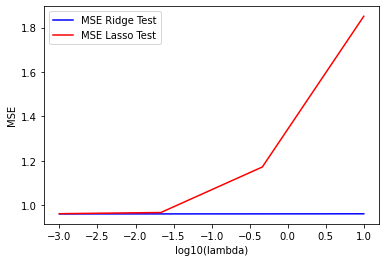

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree+1):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

How can we understand this?

## Invoking Bayes' theorem

Using Bayes' theorem we can gain a better intuition about Ridge and Lasso regression. 

For ordinary least squares we postulated that the maximum likelihood for the doamin of events $\boldsymbol{D}$ (one-dimensional case)

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})],
$$

is given by

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

In Bayes' theorem this function plays the role of the so-called likelihood. We could now ask the question what is the posterior probability of a parameter set $\boldsymbol{\beta}$ given a domain of events $\boldsymbol{D}$?  That is, how can we define the posterior probability

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D}).
$$

Bayes' theorem comes to our rescue here since (omitting the normalization constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})\propto p(\boldsymbol{D}\vert\boldsymbol{\beta})p(\boldsymbol{\beta}).
$$

We have a model for $p(\boldsymbol{D}\vert\boldsymbol{\beta})$ but need one for the **prior** $p(\boldsymbol{\beta}$!

## Ridge and Bayes

With the posterior probability defined by a likelihood which we have
already modeled and an unknown prior, we are now ready to make
additional models for the prior.

We can, based on our discussions of the variance of $\boldsymbol{\beta}$ and the mean value, assume that the prior for the values $\boldsymbol{\beta}$ is given by a Gaussian with mean value zero and variance $\tau^2$, that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta\vert\boldsymbol{D})}=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

We can now optimize this quantity with respect to $\boldsymbol{\beta}$. As we
did for OLS, this is most conveniently done by taking the negative
logarithm of the posterior probability. Doing so and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{2\tau^2}\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

and replacing $1/2\tau^2$ with $\lambda$ we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

which is our Ridge cost function!  Nice, isn't it?

## Lasso and Bayes

To derive the Lasso cost function, we simply replace the Gaussian prior with an exponential distribution ([Laplace in this case](https://en.wikipedia.org/wiki/Laplace_distribution)) with zero mean value,  that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Taking the negative
logarithm of the posterior probability and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{\tau}\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

and replacing $1/\tau$ with $\lambda$ we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

which is our Lasso cost function!

## Deriving OLS from a probability distribution

Our basic assumption when we derived the OLS equations was to assume
that our output is determined by a given continuous function
$f(\boldsymbol{x})$ and a random noise $\boldsymbol{\epsilon}$ given by the normal
distribution with zero mean value and an undetermined variance
$\sigma^2$.

We found above that the outputs $\boldsymbol{y}$ have a mean value given by
$\boldsymbol{X}\hat{\boldsymbol{\beta}}$ and variance $\sigma^2$. Since the entries to
the design matrix are not stochastic variables, we can assume that the
probability distribution of our targets is also a normal distribution
but now with mean value $\boldsymbol{X}\hat{\boldsymbol{\beta}}$. This means that a
single output $y_i$ is given by the Gaussian distribution

$$
y_i\sim \mathcal{N}(\boldsymbol{X}_{i,*}\boldsymbol{\beta}, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

## Independent and Identically Distrubuted (iid)

We assume now that the various $y_i$ values are stochastically distributed according to the above Gaussian distribution. 
We define this distribution as

$$
p(y_i, \boldsymbol{X}\vert\boldsymbol{\beta})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]},
$$

which reads as finding the likelihood of an event $y_i$ with the input variables $\boldsymbol{X}$ given the parameters (to be determined) $\boldsymbol{\beta}$.

Since these events are assumed to be independent and identicall distributed we can build the probability distribution function (PDF) for all possible event $\boldsymbol{y}$ as the product of the single events, that is we have

$$
p(\boldsymbol{y},\boldsymbol{X}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}=\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta}).
$$

We will write this in a more compact form reserving $\boldsymbol{D}$ for the domain of events, including the ouputs (targets) and the inputs. That is
in case we have a simple one-dimensional input and output case

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})].
$$

In the more general case the various inputs should be replaced by the possible features represented by the input data set $\boldsymbol{X}$. 
We can now rewrite the above probability as

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

It is a conditional probability (see below) and reads as the likelihood of a domain of events $\boldsymbol{D}$ given a set of parameters $\boldsymbol{\beta}$.

## Maximum Likelihood Estimation (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of
estimating the parameters of an assumed probability distribution,
given some observed data. This is achieved by maximizing a likelihood
function so that, under the assumed statistical model, the observed
data is the most probable. 

We will assume here that our events are given by the above Gaussian
distribution and we will determine the optimal parameters $\beta$ by
maximizing the above PDF. However, computing the derivatives of a
product function is cumbersome and can easily lead to overflow and/or
underflowproblems, with potentials for loss of numerical precision.

In practice, it is more convenient to maximize the logarithm of the
PDF because it is a monotonically increasing function of the argument.
Alternatively, and this will be our option, we will minimize the
negative of the logarithm since this is a monotonically decreasing
function.

Note also that maximization/minimization of the logarithm of the PDF
is equivalent to the maximization/minimization of the function itself.

## A new Cost Function

We could now define a new cost function to minimize, namely the negative logarithm of the above PDF

$$
C(\boldsymbol{\beta}=-\log{\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})}=-\sum_{i=0}^{n-1}\log{p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})},
$$

which becomes

$$
C(\boldsymbol{\beta}=\frac{n}{2}\log{2\pi\sigma^2}+\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}.
$$

Taking the derivative of the *new* cost function with respect to the parameters $\beta$ we recognize our familiar OLS equation, namely

$$
\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) =0,
$$

which leads to the well-known OLS equation for the optimal paramters $\beta$

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}!
$$

## Bayes' Theorem

If we combine the conditional probability with the marginal probability and the standard product rule, we have

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)},
$$

which we can rewrite as

$$
p(X\vert Y)= \frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}=\frac{p(Y\vert X)p(X)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)},
$$

which is Bayes' theorem. It allows us to evaluate the uncertainty in in $X$ after we have observed $Y$. We can easily interchange $X$ with $Y$.

## Interpretations of Bayes' Theorem

The quantity $p(Y\vert X)$ on the right-hand side of the theorem is
evaluated for the observed data $Y$ and can be viewed as a function of
the parameter space represented by $X$. This function is not
necesseraly normalized and is normally called the likelihood function.

The function $p(X)$ on the right hand side is called the prior while the function on the left hand side is the called the posterior probability. The denominator on the right hand side serves as a normalization factor for the posterior distribution.

## Test Function for what happens with OLS, Ridge and Lasso

We will play around with a study of the values for the optimal
parameters $\boldsymbol{\beta}$ using OLS, Ridge and Lasso regression.  For
OLS, you will notice as function of the noise and polynomial degree,
that the parameters $\beta$ will fluctuate from order to order in the
polynomial fit and that for larger and larger polynomial degrees of freedom, the parameters will tend to increase in value for OLS.

For Ridge and Lasso regression, the higher order parameters will typically be reduced, providing thereby less fluctuations from one order to another one.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

How can we understand this?

## Rerunning the above code

Let us write out the values of the coefficients $\beta_i$ as functions
of the polynomial degree and noise. We will focus only on the Ridge
results and some few selected values of the hyperparameter $\lambda$.

If we don't include any noise and run this code for different values
of the polynomial degree, we notice that the results for $\beta_i$ do
not show great changes from one order to the next. This is an
indication that for higher polynomial orders, our parameters become
less important.

If we however add noise, what happens is that the polynomial fit is
trying to adjust the fit to traverse in the best possible way all data
points. This can lead to large fluctuations in the parameters
$\beta_i$ as functions of polynomial order. It will also be reflected
in a larger value of the variance of each parameter $\beta_i$.  What
Ridge regression (and Lasso as well) are doing then is to try to
quench the fluctuations in the parameters of $\beta_i$ which have a
large variance (normally for higher orders in the polynomial).

In [10]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set.
n = 1000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)#+ np.random.randn(n)

Maxpolydegree = 6
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree+1):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decide which values of lambda to use
nlambdas = 2
lambdas = np.logspace(-3, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge only
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    Coeffs = np.array(RegRidge.coef_)
    BetaValues = pd.DataFrame(Coeffs)
    BetaValues.columns = ['beta']
    display(BetaValues)

,beta
0,1.028131
1,0.105091
2,-0.829401
3,0.297291
4,0.535695
5,-0.215732


,beta
0,0.761202
1,0.156787
2,0.036338
3,0.000648
4,-0.011492
5,-0.015502


## Invoking Bayes' theorem

Using Bayes' theorem we can gain a better intuition about Ridge and Lasso regression. 

For ordinary least squares we postulated that the maximum likelihood for the doamin of events $\boldsymbol{D}$ (one-dimensional case)

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})],
$$

is given by

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

In Bayes' theorem this function plays the role of the so-called likelihood. We could now ask the question what is the posterior probability of a parameter set $\boldsymbol{\beta}$ given a domain of events $\boldsymbol{D}$?  That is, how can we define the posterior probability

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D}).
$$

Bayes' theorem comes to our rescue here since (omitting the normalization constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})\propto p(\boldsymbol{D}\vert\boldsymbol{\beta})p(\boldsymbol{\beta}).
$$

We have a model for $p(\boldsymbol{D}\vert\boldsymbol{\beta})$ but need one for the **prior** $p(\boldsymbol{\beta}$!

## Ridge and Bayes

With the posterior probability defined by a likelihood which we have
already modeled and an unknown prior, we are now ready to make
additional models for the prior.

We can, based on our discussions of the variance of $\boldsymbol{\beta}$ and the mean value, assume that the prior for the values $\boldsymbol{\beta}$ is given by a Gaussian with mean value zero and variance $\tau^2$, that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta\vert\boldsymbol{D})}=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

We can now optimize this quantity with respect to $\boldsymbol{\beta}$. As we
did for OLS, this is most conveniently done by taking the negative
logarithm of the posterior probability. Doing so and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{2\tau^2}\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

and replacing $1/2\tau^2$ with $\lambda$ we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

which is our Ridge cost function!  Nice, isn't it?

## Lasso and Bayes

To derive the Lasso cost function, we simply replace the Gaussian prior with an exponential distribution ([Laplace in this case](https://en.wikipedia.org/wiki/Laplace_distribution)) with zero mean value,  that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Taking the negative
logarithm of the posterior probability and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{\tau}\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

and replacing $1/\tau$ with $\lambda$ we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

which is our Lasso cost function!

## Why resampling methods

Before we proceed, we need to rethink what we have been doing. In our
eager to fit the data, we have omitted several important elements in
our regression analysis. In what follows we will
1. look at statistical properties, including a discussion of mean values, variance and the so-called bias-variance tradeoff

2. introduce resampling techniques like cross-validation, bootstrapping and jackknife and more

and discuss how to select a given model (one of the difficult parts in machine learning).

## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.

Two resampling methods are often used in Machine Learning analyses,
1. The **bootstrap method**

2. and **Cross-Validation**

In addition there are several other methods such as the Jackknife and the Blocking methods. We will discuss in particular
cross-validation and the bootstrap method.

## Resampling approaches can be computationally expensive

Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.

## Why resampling methods ?
**Statistical analysis.**

* Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods which are widely used in statistical analyses.

* The results can be analysed with the same statistical tools as we would use when analysing experimental data.

* As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

## Statistical analysis

* As in other experiments, many numerical  experiments have two classes of errors:

  * Statistical errors

  * Systematical errors

* Statistical errors can be estimated using standard tools from statistics

* Systematical errors are method specific and must be treated differently from case to case.

## Resampling methods

With all these analytical equations for both the OLS and Ridge
regression, we will now outline how to assess a given model. This will
lead to a discussion of the so-called bias-variance tradeoff (see
below) and so-called resampling methods.

One of the quantities we have discussed as a way to measure errors is
the mean-squared error (MSE), mainly used for fitting of continuous
functions. Another choice is the absolute error.

In the discussions below we will focus on the MSE and in particular since we will split the data into test and training data,
we discuss the
1. prediction error or simply the **test error** $\mathrm{Err_{Test}}$, where we have a fixed training set and the test error is the MSE arising from the data reserved for testing. We discuss also the 

2. training error $\mathrm{Err_{Train}}$, which is the average loss over the training data.

As our model becomes more and more complex, more of the training data tends to  used. The training may thence adapt to more complicated structures in the data. This may lead to a decrease in the bias (see below for code example) and a slight increase of the variance for the test error.
For a certain level of complexity the test error will reach minimum, before starting to increase again. The
training error reaches a saturation.

## Resampling methods: Jackknife and Bootstrap

Two famous
resampling methods are the **independent bootstrap** and **the jackknife**. 

The jackknife is a special case of the independent bootstrap. Still, the jackknife was made
popular prior to the independent bootstrap. And as the popularity of
the independent bootstrap soared, new variants, such as **the dependent bootstrap** have also been developed..

The Jackknife and independent bootstrap work for
independent, identically distributed random variables.
If these conditions are not
satisfied, the methods will fail.  Yet, it should be said that if the data are
independent, identically distributed, and we only want to estimate the
variance of $\overline{X}$ (which often is the case), then there is no
need for bootstrapping.

## Resampling methods: Jackknife

The Jackknife works by making many replicas of the estimator $\widehat{\beta}$. 
The jackknife is a resampling method where we systematically leave out one observation from the vector of observed values $\boldsymbol{x} = (x_1,x_2,\cdots,X_n)$. 
Let $\boldsymbol{x}_i$ denote the vector

$$
\boldsymbol{x}_i = (x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_n),
$$

which equals the vector $\boldsymbol{x}$ with the exception that observation
number $i$ is left out. Using this notation, define
$\widehat{\beta}_i$ to be the estimator
$\widehat{\beta}$ computed using $\vec{X}_i$.

## Jackknife code example

In [7]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

## Resampling methods: Bootstrap
Bootstrapping is a non-parametric approach to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).

The textbook by [Davison on the Bootstrap Methods and their Applications](https://www.cambridge.org/core/books/bootstrap-methods-and-their-application/ED2FD043579F27952363566DC09CBD6A) provides many more insights and proofs. In this course we will take a more practical approach and use the results and theorems provided in the literature. For those interested in reading more about the bootstrap methods, we recommend the above text and the one by [Efron and Tibshirani](https://www.routledge.com/An-Introduction-to-the-Bootstrap/Efron-Tibshirani/p/book/9780412042317).

Before we proceed however, we need to remind ourselves about a central theorem in statistics, namely the so-called **central limit theorem**.

## The Central Limit Theorem

Suppose we have a PDF $p(x)$ from which we generate  a series $N$
of averages $\mathbb{E}[x_i]$. Each mean value $\mathbb{E}[x_i]$
is viewed as the average of a specific measurement, e.g., throwing 
dice 100 times and then taking the average value, or producing a certain
amount of random numbers. 
For notational ease, we set $\mathbb{E}[x_i]=x_i$ in the discussion
which follows. We do the same for $\mathbb{E}[z]=z$.

If we compute the mean $z$ of $m$ such mean values $x_i$

$$
z=\frac{x_1+x_2+\dots+x_m}{m},
$$

the question we pose is which is the PDF of the new variable $z$.

## Finding the Limit

The probability of obtaining an average value $z$ is the product of the 
probabilities of obtaining arbitrary individual mean values $x_i$,
but with the constraint that the average is $z$. We can express this through
the following expression

$$
\tilde{p}(z)=\int dx_1p(x_1)\int dx_2p(x_2)\dots\int dx_mp(x_m)
    \delta(z-\frac{x_1+x_2+\dots+x_m}{m}),
$$

where the $\delta$-function enbodies the constraint that the mean is $z$.
All measurements that lead to each individual $x_i$ are expected to
be independent, which in turn means that we can express $\tilde{p}$ as the 
product of individual $p(x_i)$.  The independence assumption is important in the derivation of the central limit theorem.

## Rewriting the $\delta$-function

If we use the integral expression for the $\delta$-function

$$
\delta(z-\frac{x_1+x_2+\dots+x_m}{m})=\frac{1}{2\pi}\int_{-\infty}^{\infty}
   dq\exp{\left(iq(z-\frac{x_1+x_2+\dots+x_m}{m})\right)},
$$

and inserting $e^{i\mu q-i\mu q}$ where $\mu$ is the mean value
we arrive at

$$
\tilde{p}(z)=\frac{1}{2\pi}\int_{-\infty}^{\infty}
   dq\exp{\left(iq(z-\mu)\right)}\left[\int_{-\infty}^{\infty}
   dxp(x)\exp{\left(iq(\mu-x)/m\right)}\right]^m,
$$

with the integral over $x$ resulting in

$$
\int_{-\infty}^{\infty}dxp(x)\exp{\left(iq(\mu-x)/m\right)}=
  \int_{-\infty}^{\infty}dxp(x)
   \left[1+\frac{iq(\mu-x)}{m}-\frac{q^2(\mu-x)^2}{2m^2}+\dots\right].
$$

## Identifying Terms

The second term on the rhs disappears since this is just the mean and 
employing the definition of $\sigma^2$ we have

$$
\int_{-\infty}^{\infty}dxp(x)e^{\left(iq(\mu-x)/m\right)}=
  1-\frac{q^2\sigma^2}{2m^2}+\dots,
$$

resulting in

$$
\left[\int_{-\infty}^{\infty}dxp(x)\exp{\left(iq(\mu-x)/m\right)}\right]^m\approx
  \left[1-\frac{q^2\sigma^2}{2m^2}+\dots \right]^m,
$$

and in the limit $m\rightarrow \infty$ we obtain

$$
\tilde{p}(z)=\frac{1}{\sqrt{2\pi}(\sigma/\sqrt{m})}
    \exp{\left(-\frac{(z-\mu)^2}{2(\sigma/\sqrt{m})^2}\right)},
$$

which is the normal distribution with variance
$\sigma^2_m=\sigma^2/m$, where $\sigma$ is the variance of the PDF $p(x)$
and $\mu$ is also the mean of the PDF $p(x)$.

## Wrapping it up

Thus, the central limit theorem states that the PDF $\tilde{p}(z)$ of
the average of $m$ random values corresponding to a PDF $p(x)$ 
is a normal distribution whose mean is the 
mean value of the PDF $p(x)$ and whose variance is the variance
of the PDF $p(x)$ divided by $m$, the number of values used to compute $z$.

The central limit theorem leads to the well-known expression for the
standard deviation, given by

$$
\sigma_m=
\frac{\sigma}{\sqrt{m}}.
$$

The latter is true only if the average value is known exactly. This is obtained in the limit
$m\rightarrow \infty$  only. Because the mean and the variance are measured quantities we obtain 
the familiar expression in statistics (the so-called Bessel correction)

$$
\sigma_m\approx 
\frac{\sigma}{\sqrt{m-1}}.
$$

In many cases however the above estimate for the standard deviation,
in particular if correlations are strong, may be too simplistic. Keep
in mind that we have assumed that the variables $x$ are independent
and identically distributed. This is obviously not always the
case. For example, the random numbers (or better pseudorandom numbers)
we generate in various calculations do always exhibit some
correlations.

The theorem is satisfied by a large class of PDFs. Note however that for a
finite $m$, it is not always possible to find a closed form /analytic expression for
$\tilde{p}(x)$.

## Confidence Intervals

Confidence intervals are used in statistics and represent a type of estimate
computed from the observed data. This gives a range of values for an
unknown parameter such as the parameters $\boldsymbol{\beta}$ from linear regression.

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we found 
$\mathbb{E}(\boldsymbol{\beta}) = \boldsymbol{\beta}$, which means that the estimator of the regression parameters is unbiased.

We found also that the variance of the estimate of the $j$-th regression coefficient is
$\boldsymbol{\sigma}^2 (\boldsymbol{\beta}_j ) = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $.

This quantity will be used to
construct a confidence interval for the estimates.

## Standard Approach based on the Normal Distribution

We will assume that the parameters $\beta$ follow a normal
distribution.  We can then define the confidence interval.  Here we will be using as
shorthands $\mu_{\beta}$ for the above mean value and $\sigma_{\beta}$
for the standard deviation. We have then a confidence interval

$$
\left(\mu_{\beta}\pm \frac{z\sigma_{\beta}}{\sqrt{n}}\right),
$$

where $z$ defines the level of certainty (or confidence). For a normal
distribution typical parameters are $z=2.576$ which corresponds to a
confidence of $99\%$ while $z=1.96$ corresponds to a confidence of
$95\%$.  A confidence level of $95\%$ is commonly used and it is
normally referred to as a *two-sigmas* confidence level, that is we
approximate $z\approx 2$.

For more discussions of confidence intervals (and in particular linked with a discussion of the bootstrap method), see chapter 5 of the textbook by [Davison on the Bootstrap Methods and their Applications](https://www.cambridge.org/core/books/bootstrap-methods-and-their-application/ED2FD043579F27952363566DC09CBD6A)

In this text you will also find an in-depth discussion of the
Bootstrap method, why it works and various theorems related to it.

## Resampling methods: Bootstrap background

Since $\widehat{\beta} = \widehat{\beta}(\boldsymbol{X})$ is a function of random variables,
$\widehat{\beta}$ itself must be a random variable. Thus it has
a pdf, call this function $p(\boldsymbol{t})$. The aim of the bootstrap is to
estimate $p(\boldsymbol{t})$ by the relative frequency of
$\widehat{\beta}$. You can think of this as using a histogram
in the place of $p(\boldsymbol{t})$. If the relative frequency closely
resembles $p(\vec{t})$, then using numerics, it is straight forward to
estimate all the interesting parameters of $p(\boldsymbol{t})$ using point
estimators.

## Resampling methods: More Bootstrap background

In the case that $\widehat{\beta}$ has
more than one component, and the components are independent, we use the
same estimator on each component separately.  If the probability
density function of $X_i$, $p(x)$, had been known, then it would have
been straightforward to do this by: 
1. Drawing lots of numbers from $p(x)$, suppose we call one such set of numbers $(X_1^*, X_2^*, \cdots, X_n^*)$. 

2. Then using these numbers, we could compute a replica of $\widehat{\beta}$ called $\widehat{\beta}^*$. 

By repeated use of the above two points, many
estimates of $\widehat{\beta}$ can  be obtained. The
idea is to use the relative frequency of $\widehat{\beta}^*$
(think of a histogram) as an estimate of $p(\boldsymbol{t})$.

## Resampling methods: Bootstrap approach

But
unless there is enough information available about the process that
generated $X_1,X_2,\cdots,X_n$, $p(x)$ is in general
unknown. Therefore, [Efron in 1979](https://projecteuclid.org/euclid.aos/1176344552)  asked the
question: What if we replace $p(x)$ by the relative frequency
of the observation $X_i$?

If we draw observations in accordance with
the relative frequency of the observations, will we obtain the same
result in some asymptotic sense? The answer is yes.

## Resampling methods: Bootstrap steps

The independent bootstrap works like this: 

1. Draw with replacement $n$ numbers for the observed variables $\boldsymbol{x} = (x_1,x_2,\cdots,x_n)$. 

2. Define a vector $\boldsymbol{x}^*$ containing the values which were drawn from $\boldsymbol{x}$. 

3. Using the vector $\boldsymbol{x}^*$ compute $\widehat{\beta}^*$ by evaluating $\widehat \beta$ under the observations $\boldsymbol{x}^*$. 

4. Repeat this process $k$ times. 

When you are done, you can draw a histogram of the relative frequency
of $\widehat \beta^*$. This is your estimate of the probability
distribution $p(t)$. Using this probability distribution you can
estimate any statistics thereof. In principle you never draw the
histogram of the relative frequency of $\widehat{\beta}^*$. Instead
you use the estimators corresponding to the statistic of interest. For
example, if you are interested in estimating the variance of $\widehat
\beta$, apply the etsimator $\widehat \sigma^2$ to the values
$\widehat \beta^*$.

## Code example for the Bootstrap method

The following code starts with a Gaussian distribution with mean value
$\mu =100$ and variance $\sigma=15$. We use this to generate the data
used in the bootstrap analysis. The bootstrap analysis returns a data
set after a given number of bootstrap operations (as many as we have
data points). This data set consists of estimated mean values for each
bootstrap operation. The histogram generated by the bootstrap method
shows that the distribution for these mean values is also a Gaussian,
centered around the mean value $\mu=100$ but with standard deviation
$\sigma/\sqrt{n}$, where $n$ is the number of bootstrap samples (in
this case the same as the number of original data points). The value
of the standard deviation is what we expect from the central limit
theorem.

In [8]:
import numpy as np
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt

# Returns mean of bootstrap samples 
# Bootstrap algorithm
def bootstrap(data, datapoints):
    t = np.zeros(datapoints)
    n = len(data)
    # non-parametric bootstrap         
    for i in range(datapoints):
        t[i] = np.mean(data[np.random.randint(0,n,n)])
    # analysis    
    print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (np.mean(data), np.std(data),np.mean(t),np.std(t)))
    return t

# We set the mean value to 100 and the standard deviation to 15
mu, sigma = 100, 15
datapoints = 10000
# We generate random numbers according to the normal distribution
x = mu + sigma*np.random.randn(datapoints)
# bootstrap returns the data sample                                    
t = bootstrap(x, datapoints)

We see that our new variance and from that the standard deviation, agrees with the central limit theorem.

## Plotting the Histogram

In [9]:
# the histogram of the bootstrapped data (normalized data if density = True)
n, binsboot, patches = plt.hist(t, 50, density=True, facecolor='red', alpha=0.75)
# add a 'best fit' line  
y = norm.pdf(binsboot, np.mean(t), np.std(t))
lt = plt.plot(binsboot, y, 'b', linewidth=1)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## The bias-variance tradeoff

We will discuss the bias-variance tradeoff in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks. Consider a dataset $\mathcal{D}$ consisting of the data
$\mathbf{X}_\mathcal{D}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$. 

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}
$$

where $\epsilon$ is normally distributed with mean zero and standard deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$. 

Thereafter we found the parameters $\boldsymbol{\beta}$ by optimizing the means squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

We can rewrite this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

The three terms represent the square of the bias of the learning
method, which can be thought of as the error caused by the simplifying
assumptions built into the method. The second term represents the
variance of the chosen model and finally the last terms is variance of
the error $\boldsymbol{\epsilon}$.

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$. The mean value of $\boldsymbol{\epsilon}$ is by definition equal to zero. Furthermore, the function $f$ is not a stochastics variable, idem for $\boldsymbol{\tilde{y}}$.
We use a more compact notation in terms of the expectation value

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

which, using the abovementioned expectation values can be rewritten as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2,
$$

that is the rewriting in terms of the so-called bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.

## A way to Read the Bias-Variance Tradeoff

<!-- dom:FIGURE: [figures/BiasVariance.png, width=600 frac=0.9] -->
<!-- begin figure -->

<img src="figures/BiasVariance.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Example code for Bias-Variance tradeoff

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()

## Understanding what happens

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

## Summing up

The bias-variance tradeoff summarizes the fundamental tension in
machine learning, particularly supervised learning, between the
complexity of a model and the amount of training data needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 

The above equations tell us that in
order to minimize the expected test error, we need to select a
statistical learning method that simultaneously achieves low variance
and low bias. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.

What do we mean by the variance and bias of a statistical learning
method? The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large changes in the model. In general, more
flexible statistical methods have higher variance.

You may also find this recent [article](https://www.pnas.org/content/116/32/15849) of interest.

## Another Example from Scikit-Learn's Repository

In [12]:
"""
============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Various steps in cross-validation

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a fast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this $k$-fold cross-validation structures the data splitting. The
samples are divided into $k$ more or less equally sized exhaustive and
mutually exclusive subsets. In turn (at each split) one of these
subsets plays the role of the test set while the union of the
remaining subsets constitutes the training set. Such a splitting
warrants a balanced representation of each sample in both training and
test set over the splits. Still the division into the $k$ subsets
involves a degree of randomness. This may be fully excluded when
choosing $k=n$. This particular case is referred to as leave-one-out
cross-validation (LOOCV).

## How to set up the cross-validation for Ridge and/or Lasso

* Define a range of interest for the penalty parameter.

* Divide the data set into training and test set comprising samples $\{1, \ldots, n\} \setminus i$ and $\{ i \}$, respectively.

* Fit the linear regression model by means of ridge estimation  for each $\lambda$ in the grid using the training set, and the corresponding estimate of the error variance $\boldsymbol{\sigma}_{-i}^2(\lambda)$, as

$$
\begin{align*}
\boldsymbol{\beta}_{-i}(\lambda) & =  ( \boldsymbol{X}_{-i, \ast}^{T}
\boldsymbol{X}_{-i, \ast} + \lambda \boldsymbol{I}_{pp})^{-1}
\boldsymbol{X}_{-i, \ast}^{T} \boldsymbol{y}_{-i}
\end{align*}
$$

* Evaluate the prediction performance of these models on the test set by $[y_i, \boldsymbol{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]$. Or, by the prediction error $|y_i - \boldsymbol{X}_{i, \ast} \boldsymbol{\beta}_{-i}(\lambda)|$, the relative error, the error squared or the R2 score function.

* Repeat the first three steps  such that each sample plays the role of the test set once.

* Average the prediction performances of the test sets at each grid point of the penalty bias/parameter. It is an estimate of the prediction performance of the model corresponding to this value of the penalty parameter on novel data. It is defined as

$$
\begin{align*}
\frac{1}{n} \sum_{i = 1}^n \log\{L[y_i, \mathbf{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]\}.
\end{align*}
$$

## Cross-validation in brief

For the various values of $k$

1. shuffle the dataset randomly.

2. Split the dataset into $k$ groups.

3. For each unique group:

a. Decide which group to use as set for test data

b. Take the remaining groups as a training data set

c. Fit a model on the training set and evaluate it on the test set

d. Retain the evaluation score and discard the model

5. Summarize the model using the sample of model evaluation scores

## Code Example for Cross-validation and $k$-fold Cross-validation

The code here uses Ridge regression with cross-validation (CV)  resampling and $k$-fold CV in order to fit a specific polynomial.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

## More examples on bootstrap and cross-validation and errors

In [14]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)

trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)

# loop over trials in order to estimate the expectation value of the MSE
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred) 

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    print("Degree of polynomial: %3d"% polynomial[polydegree])
    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

Note that we kept the intercept column in the fitting here. This means that we need to set the **intercept** in the call to the **Scikit-Learn** function as **False**. Alternatively, we could have set up the design matrix $X$ without the first column of ones.

## The same example but now with cross-validation

In this example we keep the intercept column again but add cross-validation in order to estimate the best possible value of the means squared error.

In [15]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
estimated_mse_sklearn = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
k =5
kfold = KFold(n_splits = k)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)
        OLS = LinearRegression(fit_intercept=False)
# loop over trials in order to estimate the expectation value of the MSE
    estimated_mse_folds = cross_val_score(OLS, X, Energies, scoring='neg_mean_squared_error', cv=kfold)
#[:, np.newaxis]
    estimated_mse_sklearn[polydegree] = np.mean(-estimated_mse_folds)

plt.plot(polynomial, np.log10(estimated_mse_sklearn), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()